__собираем статистики по объявлениям о продаже квартир__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
# !pip install plotly ipywidgets plotly-geo

In [2]:
# import re
# import numpy as np
# from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd
# import plotly
# import contextily as ctx
# from shapely.geometry import Polygon

/opt/venv/python3.10/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# tqdm.pandas()
# pd.options.plotting.backend = 'plotly'

In [4]:
# !ls -1 data

In [5]:
# import shapely
# shapely.__version__
# '1.8.4'

In [6]:
# !pip install greppo==0.0.32
# !pip install shapely==1.8.2

## считываем данные

In [7]:
data_file = 'data/data_flat.pkl'

In [8]:
cols = ['title','adr','latitude','longitude','priceM','ts']
df = pd.read_pickle(data_file)
df['dt'] = pd.to_datetime( df['ts'].dt.date )
print(len(df))
df.sample(3)[cols]

32214


,title,adr,latitude,longitude,priceM,ts
6897,"3-к. квартира, 69 м², 1/5 эт.","Севастополь, улица Генерала Лебедя, 18",44.562277,33.531442,11.99,2022-08-29 13:16:00.000000
26612,"2-комн. кв., 54 м², 3/5 этаж","Севастополь, район Ленинский, Острякова, проспект Генерала Острякова, 97",44.570626,33.524938,8.20,2022-09-16 15:11:49.899057
28274,"2-комн. кв., 47,2 м², 5/5 этаж","Севастополь, район Гагаринский, Камышовая бухта, улица Павла Корчагина, 36",44.589392,33.441008,6.50,2022-09-19 12:40:25.246363


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32214 entries, 0 to 32213
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          32214 non-null  object        
 1   price          32214 non-null  int64         
 2   adr_orig       32214 non-null  object        
 3   description    32214 non-null  object        
 4   obj_name       32214 non-null  object        
 5   ts             32214 non-null  datetime64[ns]
 6   avito_page     20271 non-null  float64       
 7   place          32214 non-null  object        
 8   nrooms         32214 non-null  int64         
 9   floor          32214 non-null  int64         
 10  nfloors        32214 non-null  int64         
 11  area           32214 non-null  float64       
 12  is_studio      32214 non-null  bool          
 13  is_apartment   32214 non-null  bool          
 14  is_part        32214 non-null  bool          
 15  is_auction     3221

In [10]:
# берём объявления с геометкой
print(len(df))
df = df[ (~df['latitude'].isnull()) ].reset_index(drop=True)
print(len(df))

32214
32214


### ограничиваем тип объекта 

In [11]:
print(len(df))
# выкидываем "ущербные" варианты 
df = df.query('~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)&(nrooms>0)&(nrooms<4)')
print(len(df))

32214
27157


In [12]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
gdf.sample(3)[['title','adr','latitude','longitude','priceM']]

,title,adr,latitude,longitude,priceM
15198,"2-к. квартира, 62 м², 4/10 эт.","Севастополь, улица Военных Строителей, стр. 6.3",44.567678,33.407492,4.95
20578,"2-комн. кв., 91,8 м², 1/5 этаж","Севастополь, район Гагаринский, 5-й, улица Тараса Шевченко, 20",44.579281,33.458022,11.50
1312,"2-к. квартира, 45 м², 5/5 эт.","Севастополь, улица Новикова, 31",44.53,33.55,6.35


In [16]:
df.sample(10)[['title','adr','url']].to_dict('records') 

[{'title': '2-к. квартира, 62,4\xa0м², 5/11\xa0эт.',
  'adr': 'Севастополь, улица Братьев Манганари, 22',
  'url': 'https://avito.ru/2552749796'},
 {'title': '2-к. квартира, 46\xa0м², 3/5\xa0эт.',
  'adr': 'Севастополь, проспект Октябрьской Революции, 33',
  'url': 'https://avito.ru/2515828180'},
 {'title': '2-к. квартира, 62\xa0м², 2/10\xa0эт.',
  'adr': 'Севастополь, улица Военных Строителей, д. 10/3В',
  'url': 'https://avito.ru/2276062661'},
 {'title': '1-к. квартира, 44\xa0м², 3/7\xa0эт.',
  'adr': 'Севастополь, улица Вакуленчука, д. 28',
  'url': 'https://avito.ru/2429030034'},
 {'title': '3-к. квартира, 98\xa0м², 4/5\xa0эт.',
  'adr': 'Севастополь, улица Николая Музыки, д. 25',
  'url': 'https://avito.ru/2517143028'},
 {'title': '2-к. квартира, 69\xa0м², 4/10\xa0эт.',
  'adr': 'Севастополь, улица Генерала Крейзера, д. 8, корп. 5',
  'url': 'https://avito.ru/2468258132'},
 {'title': '2-к. квартира, 63\xa0м², 8/10\xa0эт.',
  'adr': 'Севастополь,Античный проспект , 22',
  'url': 'h

In [13]:
# gdf.sample(3)[['title','adr','latitude','longitude','priceM']].to_json()

In [14]:
# gdf.to_file(data_file.replace('.pkl','.shp'))

In [15]:
# gdf.to_file(data_file.replace('.pkl','.geojson'), driver='GeoJSON')

In [16]:
# gdf.to_file(data_file.replace('.pkl','.gpkg'), layer='points', driver="GPKG")

In [17]:
del df

In [18]:
gdf[['title','adr','priceM','geometry']].sample(100).explore()

## общая статистика изменение цены

In [19]:
stat = (
    gdf.query('priceM>1.')
    .groupby(['nrooms','dt'])
    ['priceM'].describe(percentiles=[.1,.25,.5,.75,.9])
)

stat

count  mean  std  min   10%   25%   50%   75%   90%    max
nrooms dt                                                                     
1      2022-08-26 1203.00  6.26 1.91 1.59  4.07  5.00  6.00  7.30  8.50  18.50
       2022-08-29 1191.00  6.25 1.90 1.75  4.11  5.00  6.00  7.21  8.50  18.50
       2022-08-31 1180.00  6.34 1.92 1.30  4.20  5.09  6.00  7.43  8.76  18.50
       2022-09-01 1159.00  6.32 1.89 1.30  4.15  5.10  6.00  7.40  8.51  18.50
       2022-09-02  365.00  6.31 2.10 3.65  4.00  4.85  5.81  7.21  9.35  14.90
       2022-09-05  372.00  6.21 2.10 3.10  3.99  4.81  5.55  7.07  9.35  14.90
       2022-09-06  372.00  6.22 2.10 3.15  3.99  4.83  5.62  7.05  9.33  14.90
       2022-09-07  320.00  6.35 2.10 3.10  4.09  4.87  5.80  7.26  9.35  14.90
       2022-09-08 1031.00  5.92 2.35 1.40  3.50  4.25  5.42  7.10  9.00  18.50
       2022-09-12  906.00  5.89 2.35 1.40  3.49  4.40  5.42  7.00  8.70  18.50
       2022-09-13  910.00  5.96 2.41 1.40  3.40  4.30  5.50  7.20  9.12  18.50
       2022-09-15  916.00  5.91 2.30 1.40  3.49  4.45  5.50  7.00  8.86  18.50
       2022-09-16  830.00  6.43 2.66 1.40  3.98  5.00  5.95  7.29  9.41  40.00
       2022-09-19  810.00  6.42 2.68 1.40  3.94  5.00  5.90  7.30  9.35  40.00
       2022-09-22  797.00  6.43 2.57 1.40  4.20  5.10  5.95  7.30  9.06  40.00
       2022-09-26  845.00  6.33 1.96 1.47  4.30  5.00  5.95  7.20  8.78  15.52
2      2022-08-26  941.00  8.82 3.30 2.80  5.80  6.60  8.15 10.21 12.67  36.00
       2022-08-29  936.00  8.87 3.30 2.80  5.88  6.70  8.19 10.42 12.64  36.00
       2022-08-31  925.00  8.83 3.20 2.60  5.80  6.69  8.10 10.35 12.85  35.00
       2022-09-01  947.00  8.91 3.32 2.65  5.80  6.70  8.18 10.50 12.90  36.00
       2022-09-02  112.00  9.66 2.65 4.91  6.36  7.55  9.43 11.53 12.97  15.70
       2022-09-05  131.00  9.76 2.70 4.92  6.40  8.00  9.28 11.37 13.65  15.70
       2022-09-06  187.00  9.71 2.69 4.91  6.32  7.83  9.28 11.45 13.65  15.70
       2022-09-07  128.00  9.75 2.85 4.91  6.20  7.49  9.14 11.77 13.93  15.70
       2022-09-08  560.00  9.44 4.16 3.20  6.00  6.74  8.39 11.13 13.65  49.12
       2022-09-12  476.00  9.25 4.34 3.00  5.70  6.60  8.22 10.88 13.63  49.12
       2022-09-13  474.00  9.16 4.38 3.00  5.65  6.54  8.18 10.61 13.60  49.12
       2022-09-15  495.00  9.10 4.16 3.00  5.90  6.60  8.18 10.60 13.58  49.12
       2022-09-16  576.00  9.45 4.12 1.70  6.07  6.98  8.32 10.80 13.63  49.12
       2022-09-19  569.00  9.30 4.11 3.20  5.90  6.90  8.25 10.79 13.50  49.12
       2022-09-22  566.00  9.32 4.13 3.20  5.90  6.80  8.25 10.80 13.50  49.12
       2022-09-26  593.00  8.60 3.55 3.80  5.89  6.55  8.00  9.52 12.08  49.12
3      2022-08-26  646.00 11.61 6.14 3.50  7.40  8.30 10.25 13.24 16.80 100.00
       2022-08-29  635.00 11.66 6.17 3.85  7.40  8.43 10.33 13.28 16.68 100.00
       2022-08-31  640.00 11.64 6.12 3.85  7.40  8.44 10.30 13.03 17.03 100.00
       2022-09-01  634.00 11.57 6.13 3.85  7.40  8.30 10.21 13.00 16.90 100.00
       2022-09-02   61.00 11.17 1.74 7.73 10.21 10.33 10.35 11.53 13.90  16.64
       2022-09-05   67.00 11.22 1.85 7.73 10.21 10.33 10.35 12.03 14.18  16.64
       2022-09-06   65.00 11.22 1.87 7.73 10.21 10.33 10.34 11.53 14.27  16.64
       2022-09-07   58.00 11.26 1.81 9.20 10.21 10.33 10.35 11.35 14.13  16.64
       2022-09-08  298.00 11.98 5.67 5.00  7.64  9.15 10.35 13.50 17.36  56.52
       2022-09-12  273.00 11.99 6.02 5.00  7.60  9.00 10.33 13.50 17.40  56.52
       2022-09-13  292.00 12.06 5.88 5.00  7.60  9.00 10.35 13.50 17.00  56.52
       2022-09-15  287.00 11.76 5.85 4.70  7.50  9.00 10.34 12.80 16.66  56.52
       2022-09-16  363.00 12.49 6.28 3.50  7.50  9.07 10.35 13.93 18.76  56.52
       2022-09-19  355.00 12.45 6.36 5.10  7.60  9.00 10.35 13.75 18.58  56.52
       2022-09-22  346.00 12.48 6.48 3.50  7.40  9.00 10.35 13.88 18.80  56.52
       2022-09-26  314.00 10.89 5.64 4.90  7.20  8.22  9.60 11.00 15.00  56.52

In [20]:
# stat_1 = stat.loc[1,['min','25%','50%']]
# [ d.strftime('%m/%d/%Y') for d in stat_1.index ]
# stat_1.values.T.tolist()

<AxesSubplot:title={'center':'цена на 1к'}, xlabel='dt'>

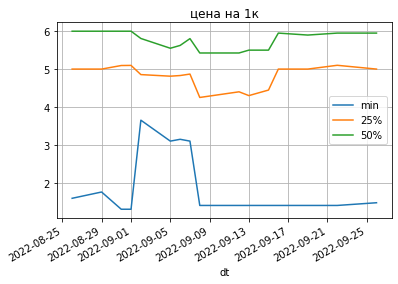

In [21]:
stat.loc[1,['min','25%','50%']].plot(title='цена на 1к', grid=True )

<AxesSubplot:title={'center':'цена на 2к'}, xlabel='dt'>

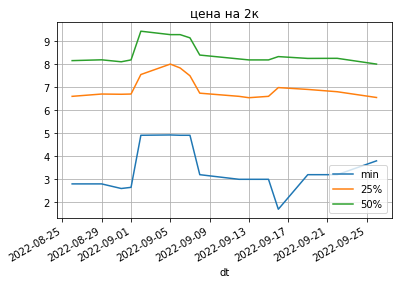

In [22]:
stat.loc[2,['min','25%','50%']].plot(title='цена на 2к',grid=True)

<AxesSubplot:title={'center':'цена на 3к'}, xlabel='dt'>

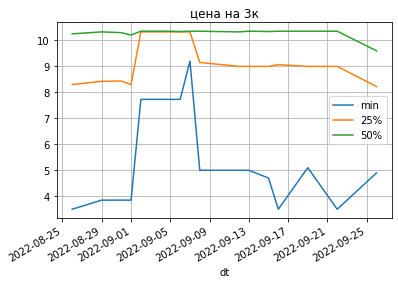

In [23]:
stat.loc[3,['min','25%','50%']].plot(title='цена на 3к',grid=True)

In [24]:
# stat.loc[2,['min']].reset_index().rename(columns={'dt':'x','min':'y'}).T.to_dict()



---

### район поиска

In [25]:
from shapely.geometry import MultiPoint

frame_all = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

In [26]:
frame_all.explore()

In [27]:
frame_all.to_file('data/frame_all.geojson', driver='GeoJSON')

### гексагональная сетка

In [28]:
import h3
from shapely.geometry import Polygon

def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

In [29]:
grid = cover_grid_hexagonal( frame_all.geometry.values[0],cell_size=6 )
print(len(grid))
grid.sample(2)

24


,hex_id,geometry
21,862d2d417ffffff,"POLYGON ((33.54559 44.82643, 33.52412 44.79706, 33.55110 44.76831, 33.59953 44.76893, 33.62101 44.79829, 33.59406 44.82704, 33.54559 44.82643))"
11,862d2882fffffff,"POLYGON ((33.57303 44.53552, 33.55163 44.50606, 33.57850 44.47724, 33.62675 44.47788, 33.64817 44.50734, 33.62132 44.53616, 33.57303 44.53552))"


In [30]:
# grid.explore()

### медиана актуальной цены

In [31]:
ts = '2022-08-01' # ограничиваем дату

# новые предложения
gdf_ = gdf[ (gdf['dt']>ts)  ] # & (gdf['priceM']<15.)

grid_values = ( 
    grid
    .sjoin(gdf_, how='inner',)
    .groupby(['hex_id'])
    ['priceM']
    .median()
    .reset_index()
)

grid.merge(grid_values,on='hex_id').explore('priceM',cmap='rainbow') #'area_name', legend=True)

## ограничиваем по район поиска

In [32]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
    { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
    for nm,f in frames_index.values
],crs='epsg:4326',)

frames

,area_name,geometry
0,"Севастополь, район Острякова","POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))"
1,"Севастополь, парк 60-летия СССР","POLYGON ((33.51805 44.58404, 33.51458 44.58408, 33.51263 44.58031, 33.51435 44.57460, 33.52004 44.57520, 33.51805 44.58404))"
2,"Севастополь, Хрусталёва/Хрюкина","POLYGON ((33.52003 44.57511, 33.52527 44.56364, 33.52116 44.56136, 33.51942 44.56406, 33.51951 44.56384, 33.51874 44.56882, 33.51426 44.57444, 33.52003 44.57511))"
3,"Севастополь, Геловани/Коломийца","POLYGON ((33.52139 44.57296, 33.53034 44.57518, 33.53318 44.57413, 33.53369 44.57139, 33.53244 44.56878, 33.53123 44.56774, 33.52440 44.56640, 33.52139 44.57296))"
4,"Севастополь, Музыки/Бирюзова","POLYGON ((33.52027 44.57528, 33.51724 44.58719, 33.52038 44.58724, 33.52554 44.58091, 33.52561 44.57790, 33.52027 44.57528))"
5,"Севастополь, кр.горка","POLYGON ((33.53426 44.59526, 33.54470 44.58945, 33.54804 44.58596, 33.55346 44.58519, 33.55707 44.57912, 33.56296 44.57711, 33.54048 44.56941, 33.53004 44.59308, 33.53426 44.59526))"
6,"Севастополь, Малахов курган","POLYGON ((33.54313 44.60612, 33.55331 44.61155, 33.55676 44.60803, 33.55772 44.60255, 33.55385 44.60019, 33.54414 44.60247, 33.54313 44.60612))"


In [33]:
frames.explore('area_name', legend=True)

In [34]:
frames.to_file('data/frames.geojson', driver='GeoJSON')

In [35]:
area_name=[
'Севастополь, парк 60-летия СССР',
#'Севастополь, Хрусталёва/Хрюкина',
#'Севастополь, район Острякова',
# 'Севастополь, Малахов курган',
]

# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

# фильтруем данные по области
print(len(gdf))
gdf_ = gdf.sjoin( frame_, how='inner', predicate='within') 
print(len(gdf_))

27157
307


In [36]:
frames.iloc[[0]]

,area_name,geometry
0,"Севастополь, район Острякова","POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))"


In [37]:
# новые (актуальные) предложения
# gdf_[gdf_['ts']>ts][['title','priceM','adr','geometry']].explore( legend=False)
gdf_[['title','priceM','adr','geometry']].explore( legend=False)

### изменение цены

In [38]:
stat = gdf_.groupby(['nrooms','dt',])['priceM'].describe(percentiles=[.1,.25,.5,.75,.9])
stat

count  mean  std  min  10%  25%  50%  75%  90%  max
nrooms dt                                                             
1      2022-08-26  11.00  5.43 0.48 4.30 4.95 5.20 5.60 5.80 5.80 5.90
       2022-08-29  14.00  5.64 0.72 4.30 4.96 5.30 5.63 5.80 6.11 7.50
       2022-08-31  14.00  5.61 0.71 4.30 4.96 5.15 5.63 5.80 6.11 7.35
       2022-09-01  14.00  5.70 0.60 4.95 5.00 5.53 5.63 5.80 6.11 7.35
       2022-09-08   6.00  5.63 0.38 4.99 5.25 5.50 5.70 5.90 5.95 6.00
       2022-09-12   6.00  5.58 0.36 4.99 5.25 5.50 5.55 5.83 5.95 6.00
       2022-09-13   5.00  5.58 0.40 4.99 5.19 5.50 5.50 5.90 5.96 6.00
       2022-09-15   5.00  5.48 0.43 4.80 5.08 5.50 5.50 5.60 5.84 6.00
       2022-09-16   5.00  5.48 0.52 4.80 5.00 5.30 5.40 5.70 6.00 6.20
       2022-09-19   5.00  5.48 0.52 4.80 5.00 5.30 5.40 5.70 6.00 6.20
       2022-09-22   8.00  5.53 0.54 4.80 4.80 5.17 5.55 6.00 6.06 6.20
       2022-09-26  11.00  5.45 0.50 4.80 4.80 5.00 5.40 5.85 6.00 6.20
2      2022-08-26  23.00  6.98 0.91 5.75 6.30 6.50 6.95 7.12 7.86 9.45
       2022-08-29  25.00  7.00 1.06 5.70 5.80 6.30 6.95 7.15 8.78 9.50
       2022-08-31  25.00  6.85 0.96 5.70 5.85 6.30 6.80 7.05 7.72 9.50
       2022-09-01  26.00  6.82 0.95 5.70 5.76 6.30 6.65 7.04 7.65 9.50
       2022-09-08   8.00  7.04 1.11 5.85 6.09 6.42 6.92 7.19 7.96 9.50
       2022-09-12   8.00  7.04 1.11 5.85 6.09 6.42 6.92 7.19 7.96 9.50
       2022-09-13   8.00  7.04 1.11 5.85 6.09 6.42 6.92 7.19 7.96 9.50
       2022-09-15   7.00  7.19 1.10 6.20 6.26 6.55 7.05 7.22 8.18 9.50
       2022-09-16  13.00  6.92 0.98 5.40 5.88 6.50 7.00 7.15 7.30 9.50
       2022-09-19  10.00  6.76 0.65 5.40 5.80 6.62 7.03 7.14 7.30 7.30
       2022-09-22  12.00  6.59 0.71 5.40 5.71 5.82 7.00 7.11 7.29 7.30
       2022-09-26  16.00  6.69 1.00 5.30 5.70 5.82 6.79 7.11 7.30 9.50
3      2022-08-26   7.00  7.53 0.50 6.90 6.90 7.20 7.70 7.70 7.94 8.30
       2022-08-29   6.00  7.50 0.54 6.90 6.90 7.05 7.60 7.70 8.00 8.30
       2022-08-31   5.00  7.46 0.59 6.90 6.90 6.90 7.50 7.70 8.06 8.30
       2022-09-01   4.00  7.60 0.58 6.90 7.08 7.35 7.60 7.85 8.12 8.30

<AxesSubplot:title={'center':'цена на 1к'}, xlabel='dt'>

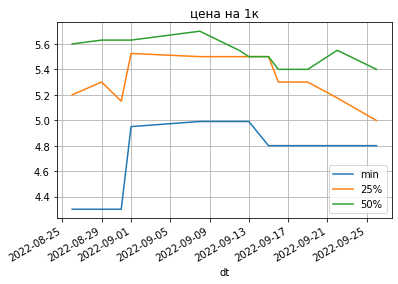

In [39]:
stat.loc[1,['min','25%','50%']].plot(title='цена на 1к',grid=True)

<AxesSubplot:title={'center':'цена на 2к'}, xlabel='dt'>

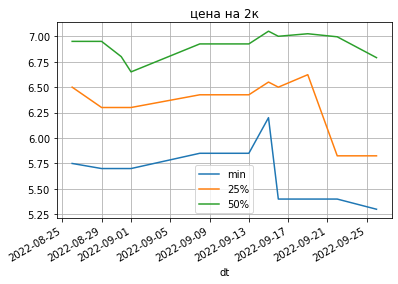

In [40]:
stat.loc[2,['min','25%','50%']].plot(title='цена на 2к',grid=True)

<AxesSubplot:title={'center':'цена на 3к'}, xlabel='dt'>

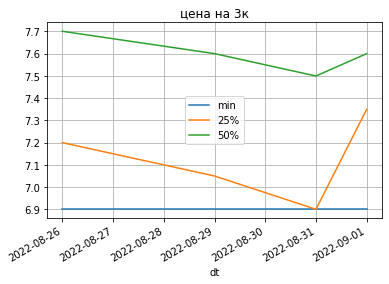

In [41]:
stat.loc[3,['min','25%','50%']].plot(title='цена на 3к',grid=True)

### гексагональная сетка

In [42]:
grid = cover_grid_hexagonal( frame_.geometry.values[0], cell_size=9 )
print(len(grid))
grid.sample(2)

4


,hex_id,geometry
0,892d289462fffff,"POLYGON ((33.51246 44.58112, 33.51214 44.57933, 33.51422 44.57817, 33.51663 44.57880, 33.51696 44.58059, 33.51487 44.58175, 33.51246 44.58112))"
2,892d2894297ffff,"POLYGON ((33.51696 44.58059, 33.51663 44.57880, 33.51872 44.57764, 33.52113 44.57827, 33.52145 44.58006, 33.51937 44.58122, 33.51696 44.58059))"


### медиана актуальной цены

In [43]:
grid_values = (
    grid
    .sjoin( gdf[ gdf['dt']>ts ], how='inner',)
    .groupby(['hex_id'])
    ['priceM']
    .median()
    .reset_index()
)

grid.merge(grid_values,on='hex_id').explore('priceM',cmap='rainbow') #'area_name', legend=True)